# Linear Regression Assignment 

### Step 1: Reading and Understanding the Data

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Step 2: Cleaning the data

In [7]:
# Checking null values in percentage
df.isnull().mean()*100

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [8]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
df1 = df[['season', 'yr' , 'mnth', 'holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','cnt']]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [10]:
import calendar
df1['mnth'] =df1['mnth'].apply(lambda x: calendar.month_abbr[x])

In [11]:
# seasons column conversion to categorical
df1.season =df1.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

In [12]:
# mapping weathersit 
df1_weathersit =df1.weathersit.map({1:'Pleasant',2:'Moderate',3:'Bad',4:'Severe'})

In [13]:
# Mapping Weekday 
df1_weekday =df1.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})

In [14]:
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Step 3: EDA

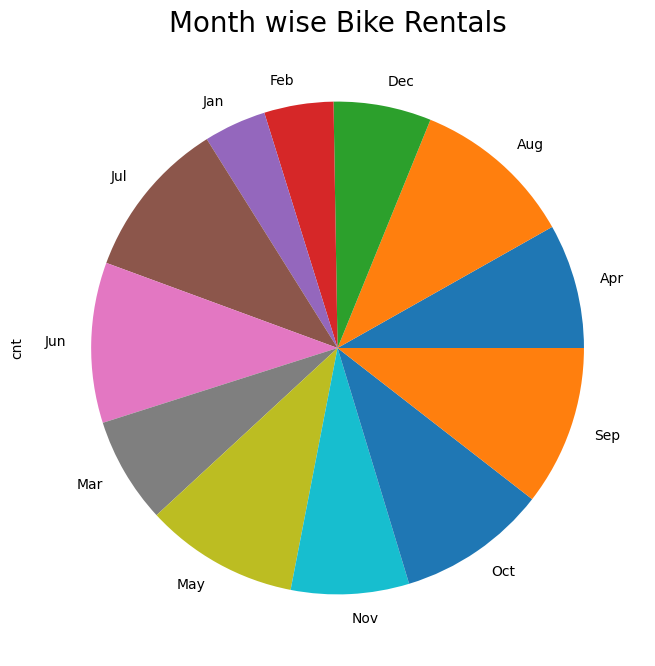

In [15]:
# Ploting a pie chart for better visualisation
plt.figure(figsize=(8,8))
df1.groupby(["mnth"])["cnt"].sum().plot.pie()
plt.title("Month wise Bike Rentals",fontsize=20)
plt.show()

**It can be observed that months from April to October has good demand for Bike Rentals**

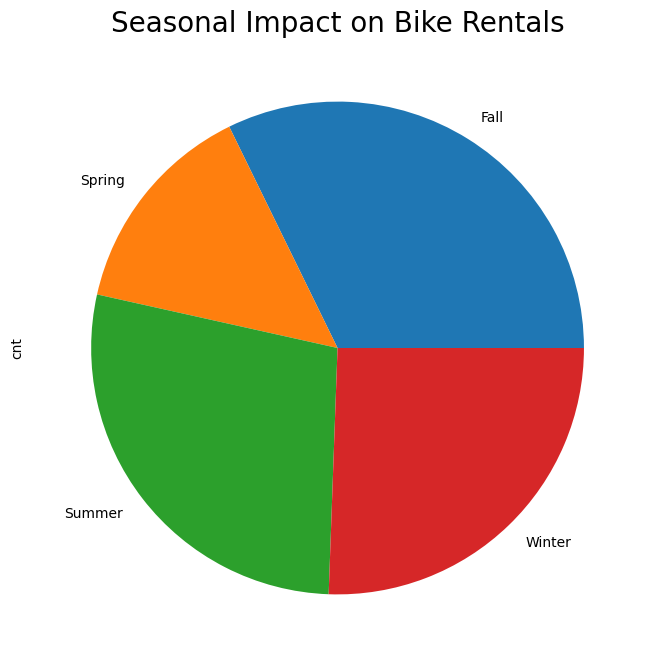

In [16]:
# Ploting a pie chart in which season has more rentals
plt.figure(figsize=(8,8))
df1.groupby(["season"])["cnt"].sum().plot.pie()
plt.title("Seasonal Impact on Bike Rentals",fontsize=20)
plt.show()

**It can be observed that Spring has least bike rentals while Fall has the highest bike rentals**

<Axes: xlabel='holiday', ylabel='cnt'>

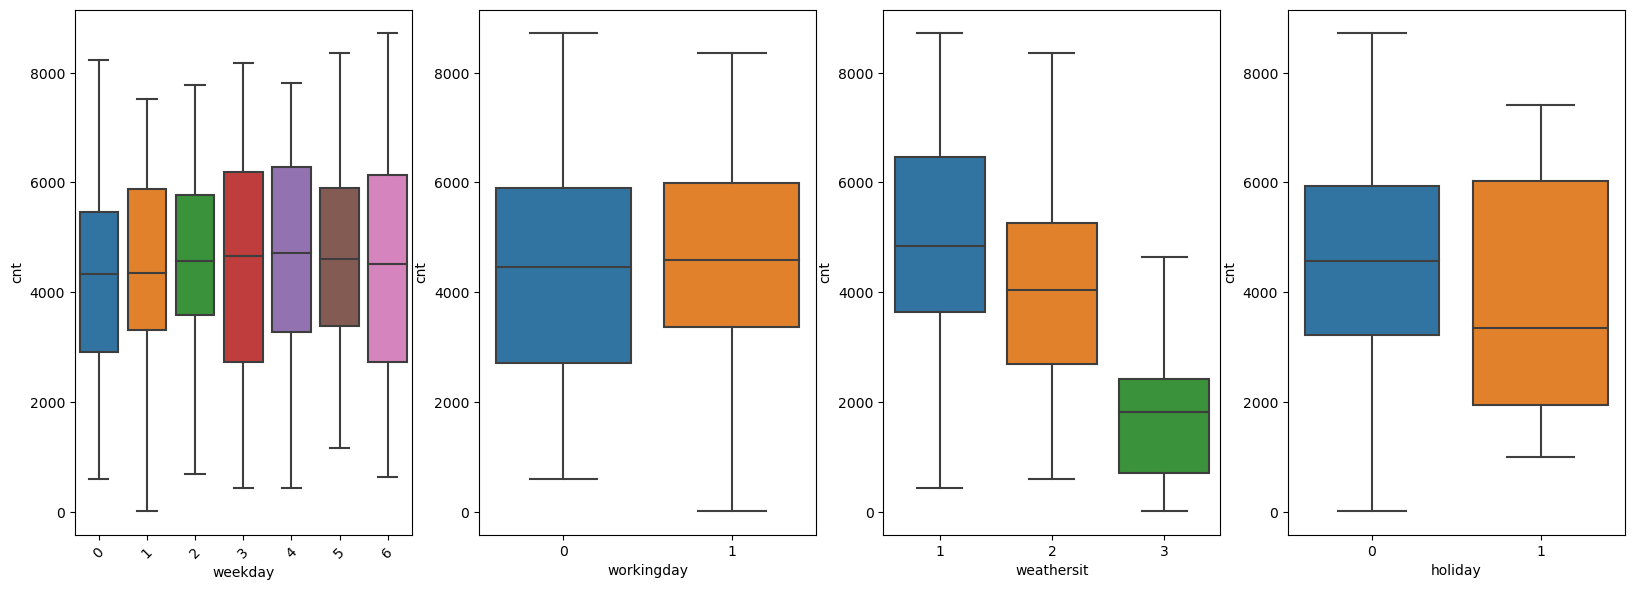

In [17]:
# Boxplot for categorical variables to see bike rentalssns.
plt.figure(figsize=(20,15))
plt.subplot(2,4,1)
sns.boxplot(x='weekday', y='cnt', data=df1)
plt.xticks(rotation=45)
plt.subplot(2,4,2)
sns.boxplot(x='workingday', y='cnt' ,data =df1)
plt.subplot(2,4,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df1)
plt.subplot(2,4,4)
sns.boxplot(x= 'holiday', y='cnt',data=df1)

#### obsevations:
##### 1.The number of rentals peaked in September, whereas they peaked in December. This observation is consistent with the observations made regarding the weather. As a result of the typical substantial snowfall in December, rentals may have declined.
##### 2.There are no users when there is heavy rain/ snow indicating that this weather is quite adverse. Highest count was seen when the weather situation was Clear, Partly Cloudy.
##### 3.The count of users decreased during the holidays.

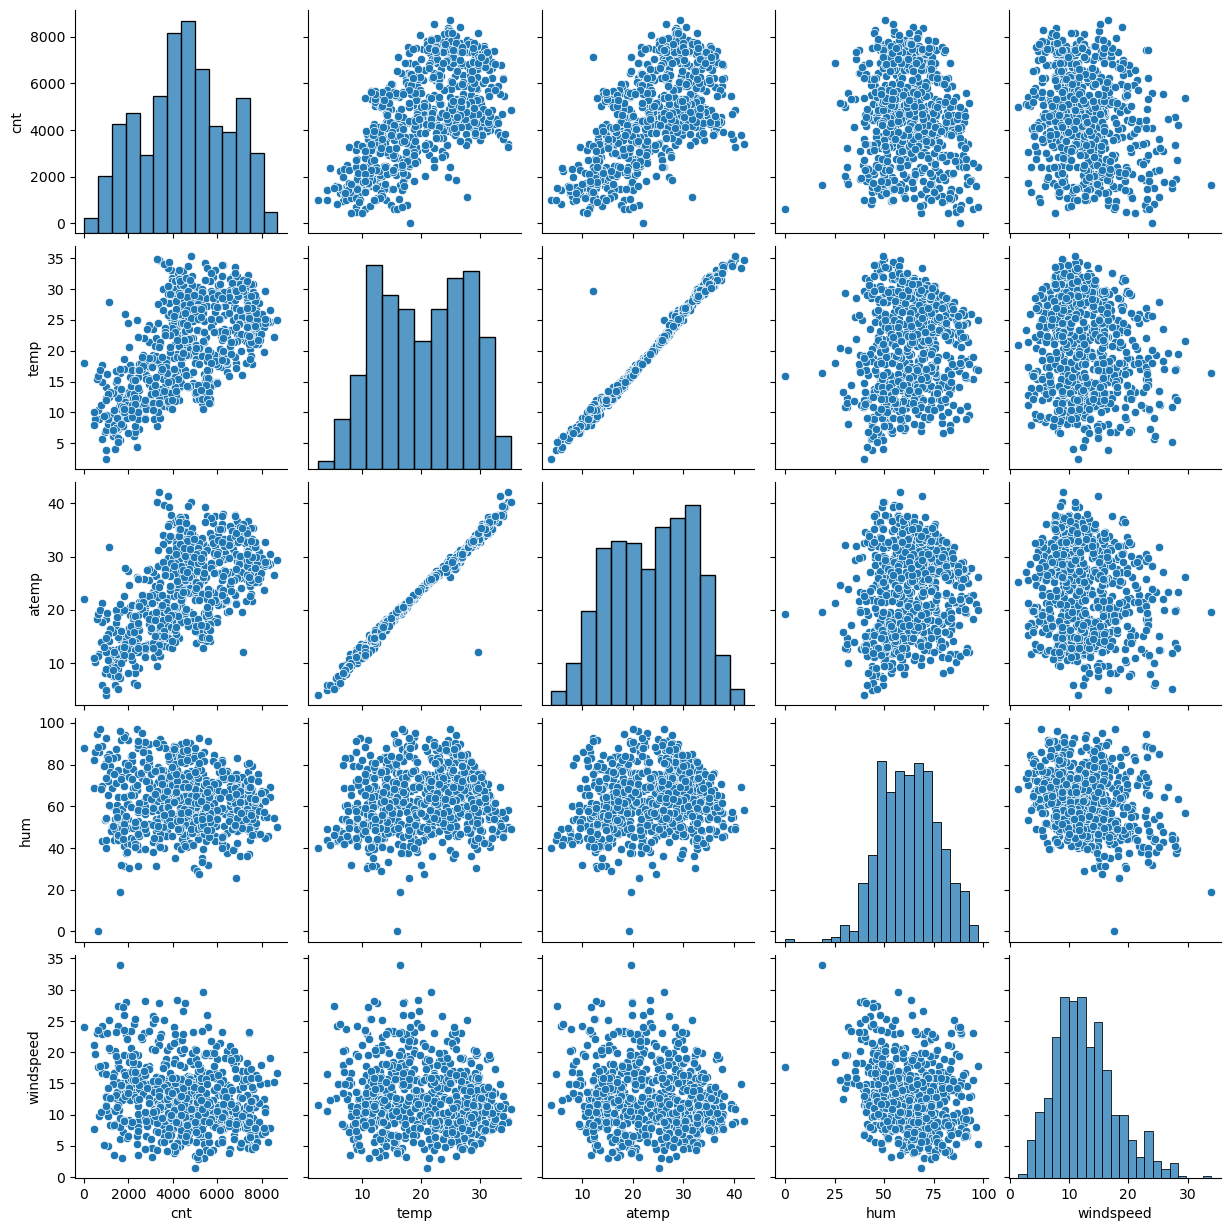

In [18]:
sns.pairplot(data=df1, vars=['cnt','temp','atemp','hum','windspeed'])
plt.show()

In [19]:
# Checking correlation
df1.corr()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-0.005466,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,-0.002945,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,-0.050322,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,0.048789,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-0.112547,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,0.014283,-0.018666,0.039769,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,0.067534,0.062542,-0.295929,0.627044,0.630685,-0.098543,-0.235132,1.000000


### Step 4: Data Preparation

 ### Creating Dummy Variables
       
We will create DUMMY variables for these 4 categorical variables namely - mnth, weekday, season & weathersit.



In [20]:
# Get the dummy Variables For The Features
dummy = df1[['season','mnth','weekday','weathersit']]

In [21]:
dummy = pd.get_dummies(dummy,drop_first=True)

In [22]:
#adding the Dummy variables to the Original dataset 
df1 =pd.concat([dummy,df1],axis=1)

In [23]:
# Deleting the Original columns season.weathersit,weekday,mnth

df1.drop(['season','weathersit','weekday','mnth'],axis=1,inplace=True)
df1.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season_Spring  730 non-null    uint8  
 1   season_Summer  730 non-null    uint8  
 2   season_Winter  730 non-null    uint8  
 3   mnth_Aug       730 non-null    uint8  
 4   mnth_Dec       730 non-null    uint8  
 5   mnth_Feb       730 non-null    uint8  
 6   mnth_Jan       730 non-null    uint8  
 7   mnth_Jul       730 non-null    uint8  
 8   mnth_Jun       730 non-null    uint8  
 9   mnth_Mar       730 non-null    uint8  
 10  mnth_May       730 non-null    uint8  
 11  mnth_Nov       730 non-null    uint8  
 12  mnth_Oct       730 non-null    uint8  
 13  mnth_Sep       730 non-null    uint8  
 14  yr             730 non-null    int64  
 15  holiday        730 non-null    int64  
 16  workingday     730 non-null    int64  
 17  temp           730 non-null    float64
 18  atemp     

### Splitting the data into test and train datasets

In [25]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df1, train_size=0.8, random_state =100)

In [26]:
train.shape

(584, 22)

In [27]:
test.shape

(146, 22)

In [28]:
#scaling the model
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [29]:
# apply scaler() to all the Columns excep the 'dummy' variables.
num_vars =['cnt','hum','windspeed','temp','atemp']

train[num_vars] = scaler.fit_transform(train[num_vars])

In [30]:
train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
367,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0.113228,0.061963,0.454701,0.695175,0.254717
648,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0.468352,0.462175,0.477458,0.299450,0.868385
44,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0.443431,0.419099,0.387290,0.807474,0.217556
705,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,1,0.326094,0.318824,0.787463,0.189819,0.573631
379,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0.133996,0.108365,0.431945,0.449210,0.263346


In [31]:
train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.251712,0.246575,0.250000,0.090753,0.087329,0.073630,0.087329,0.075342,0.077055,0.090753,...,0.092466,0.080479,0.513699,0.027397,0.667808,0.537414,0.513175,0.649499,0.319463,0.515792
std,0.434369,0.431387,0.433384,0.287504,0.282558,0.261392,0.282558,0.264169,0.266907,0.287504,...,0.289931,0.272267,0.500241,0.163378,0.471403,0.225336,0.211663,0.144219,0.168114,0.225336
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.340113,0.331819,0.535852,0.199177,0.350696
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.545191,0.530558,0.653714,0.294764,0.522837
75%,1.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.736512,0.690521,0.752361,0.410413,0.691872
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.251712,0.246575,0.250000,0.090753,0.087329,0.073630,0.087329,0.075342,0.077055,0.090753,...,0.092466,0.080479,0.513699,0.027397,0.667808,0.537414,0.513175,0.649499,0.319463,0.515792
std,0.434369,0.431387,0.433384,0.287504,0.282558,0.261392,0.282558,0.264169,0.266907,0.287504,...,0.289931,0.272267,0.500241,0.163378,0.471403,0.225336,0.211663,0.144219,0.168114,0.225336
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.340113,0.331819,0.535852,0.199177,0.350696
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.545191,0.530558,0.653714,0.294764,0.522837
75%,1.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.736512,0.690521,0.752361,0.410413,0.691872
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [33]:
y_train = train.pop('cnt')
X_train =train

In [34]:
y_train.shape

(584,)

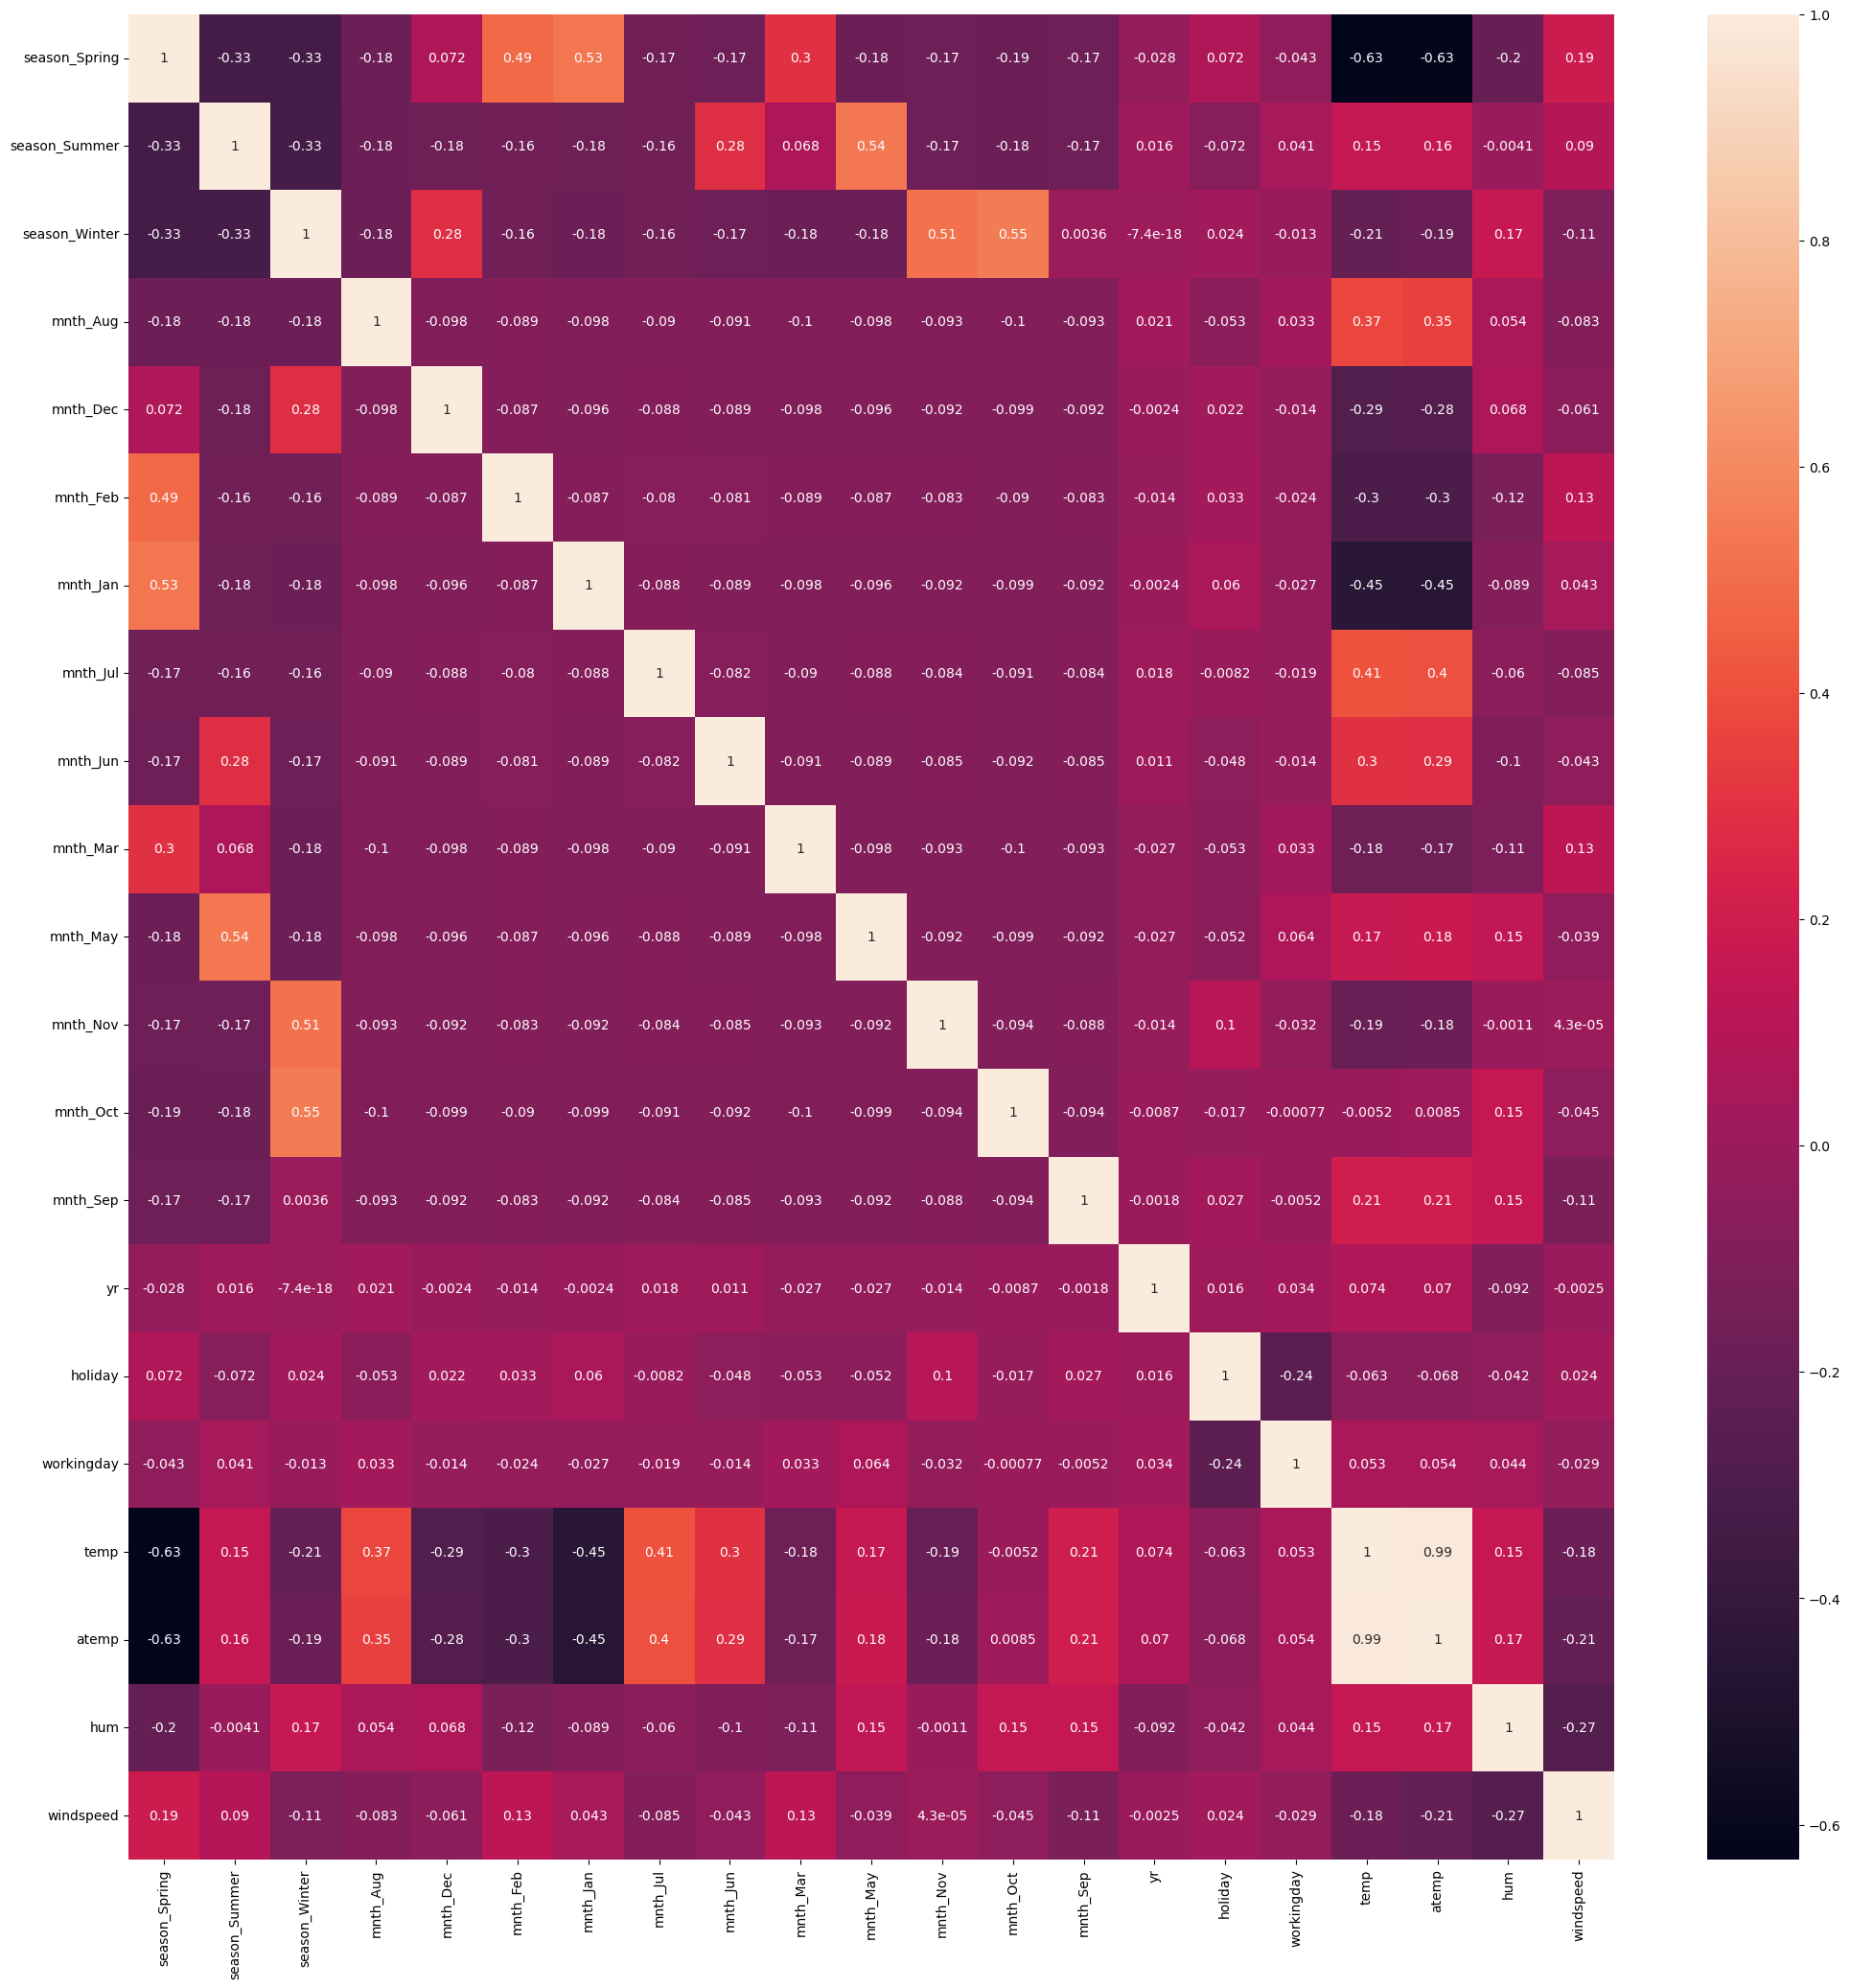

In [35]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (25,25))
sns.heatmap(train.corr(), annot = True)
plt.show()

**We can see that few variables are positively correlated and this can be good for us to build a regression model**

### Step 5: Building a linear model using RFE 

In [36]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 

In [37]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [38]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 3),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 7),
 ('mnth_Mar', False, 5),
 ('mnth_May', False, 2),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 6),
 ('mnth_Sep', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [39]:
col = X_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep', 'yr',
       'holiday', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [40]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Oct',
       'workingday'],
      dtype='object')

 ### Building model using statsmodel, for the detailed statistics

In [41]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [42]:

# Adding a constant variable 
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_rfe)

In [43]:
X_train_lm.head()

,const,season_Spring,season_Summer,season_Winter,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep,yr,holiday,temp,atemp,hum,windspeed
367,1.0,1,0,0,0,0,1,0,0,0,1,0,0.113228,0.061963,0.454701,0.695175
648,1.0,0,0,1,0,0,0,0,0,0,1,0,0.468352,0.462175,0.477458,0.299450
44,1.0,1,0,0,0,1,0,0,0,0,0,0,0.443431,0.419099,0.387290,0.807474
705,1.0,0,0,1,1,0,0,0,0,0,1,0,0.326094,0.318824,0.787463,0.189819
379,1.0,1,0,0,0,0,1,0,0,0,1,0,0.133996,0.108365,0.431945,0.449210


In [44]:
# model 1
lm_1 = sm.OLS(y_train, X_train_lm).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     174.7
Date:                Thu, 05 Oct 2023   Prob (F-statistic):          2.43e-201
Time:                        18:53:24   Log-Likelihood:                 545.83
No. Observations:                 584   AIC:                            -1060.
Df Residuals:                     568   BIC:                            -989.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3909      0.037     10.635      0.000       0.319       0.463
season_Spring    -0.0497      0.022     -2.217      0.027      -0.094      -0.006
season_Summer     0.0449      0.016      2.862      0.004       0.014       0.076
season_Winter     0.1129      0.018      6.335      0.000       0.078       0.148
mnth_Dec         -0.0384      0.018     -2.120      0.034      -0.074      -0.003
mnth_Feb         -0.0243      0.021     -1.145      0.253      -0.066       0.017
mnth_Jan         -0.0406      0.022     -1.881      0.061      -0.083       0.002
mnth_Jul         -0.0616      0.019     -3.315      0.001      -0.098      -0.025
mnth_Nov         -0.0466      0.019     -2.427      0.016      -0.084      -0.009
mnth_Sep          0.0664      0.017      3.921      0.000       0.033       0.100
yr                0.2250      0.008     27.791      0.000       0.209       0.241
holiday          -0.0845      0.025     -3.407      0.001      -0.133      -0.036
temp              0.4059      0.142      2.863      0.004       0.127       0.684
atemp             0.1439      0.145      0.994      0.321      -0.141       0.428
hum              -0.3422      0.030    -11.338      0.000      -0.401      -0.283
windspeed        -0.2292      0.026     -8.794      0.000      -0.280      -0.178
==============================================================================
Omnibus:                      124.597   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              335.845
Skew:                          -1.055   Prob(JB):                     1.18e-73
Kurtosis:                       6.058   Cond. No.                         81.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
# calculate the VIFs for the New Model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
11,temp,412.78
12,atemp,406.35
13,hum,19.74
0,season_Spring,5.45
14,windspeed,4.86
2,season_Winter,3.82
1,season_Summer,2.85
5,mnth_Jan,2.34
9,yr,2.10
4,mnth_Feb,2.01


In [47]:
# Droping season_Spring sincs its vif > 5

X_train_ref = X_train_rfe.drop(['hum'], axis=1)

In [48]:
# model 2
X_train_lm = sm.add_constant(X_train_rfe)
lm_2 = sm.OLS(y_train, X_train_lm).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     174.7
Date:                Thu, 05 Oct 2023   Prob (F-statistic):          2.43e-201
Time:                        18:53:24   Log-Likelihood:                 545.83
No. Observations:                 584   AIC:                            -1060.
Df Residuals:                     568   BIC:                            -989.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3909      0.037     10.635      0.000       0.319       0.463
season_Spring    -0.0497      0.022     -2.217      0.027      -0.094      -0.006
season_Summer     0.0449      0.016      2.862      0.004       0.014       0.076
season_Winter     0.1129      0.018      6.335      0.000       0.078       0.148
mnth_Dec         -0.0384      0.018     -2.120      0.034      -0.074      -0.003
mnth_Feb         -0.0243      0.021     -1.145      0.253      -0.066       0.017
mnth_Jan         -0.0406      0.022     -1.881      0.061      -0.083       0.002
mnth_Jul         -0.0616      0.019     -3.315      0.001      -0.098      -0.025
mnth_Nov         -0.0466      0.019     -2.427      0.016      -0.084      -0.009
mnth_Sep          0.0664      0.017      3.921      0.000       0.033       0.100
yr                0.2250      0.008     27.791      0.000       0.209       0.241
holiday          -0.0845      0.025     -3.407      0.001      -0.133      -0.036
temp              0.4059      0.142      2.863      0.004       0.127       0.684
atemp             0.1439      0.145      0.994      0.321      -0.141       0.428
hum              -0.3422      0.030    -11.338      0.000      -0.401      -0.283
windspeed        -0.2292      0.026     -8.794      0.000      -0.280      -0.178
==============================================================================
Omnibus:                      124.597   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              335.845
Skew:                          -1.055   Prob(JB):                     1.18e-73
Kurtosis:                       6.058   Cond. No.                         81.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
11,temp,412.78
12,atemp,406.35
13,hum,19.74
0,season_Spring,5.45
14,windspeed,4.86
2,season_Winter,3.82
1,season_Summer,2.85
5,mnth_Jan,2.34
9,yr,2.10
4,mnth_Feb,2.01


**Now that we VIF which is acceptable andp-value for all the features is almost 0.0 and R2 is 0.822 we will go with this model.The difference between R-square and Adjusted R-square is 0.005 which shows that no further variables are required to be removed from this model.**

### Step 6. Model Evaluation 
### Residual Analysis

In [50]:
y_train_pred = lm_2.predict(X_train_lm)

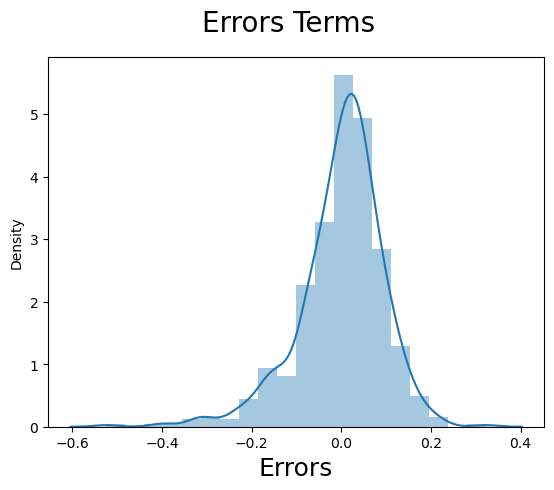

In [51]:
# plot the Histogram of the Error Term 
fig = plt.figure()
sns.distplot((y_train - y_train_pred),bins =20)
fig.suptitle('Errors Terms', fontsize = 20)
plt.xlabel("Errors", fontsize =18)
plt.show()

Residuals distribution should follow normal distribution and centred around 0.(mean = 0).
The above diagram shows that the residuals are
distributed about mean = 0.


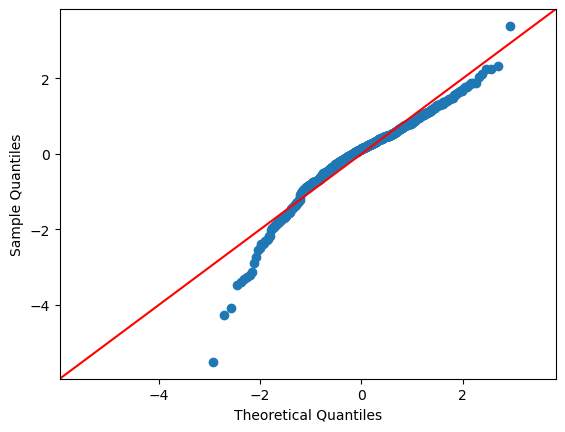

In [52]:
# plot the qq-plot of the error terms
sm.qqplot((y_train - y_train_pred),fit=True, line='45')
plt.show()

### Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model

In [53]:
num_vars = ['cnt','hum','windspeed','temp','atemp']

test[num_vars] = scaler.transform(test[num_vars])

In [54]:
test.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.226027,0.273973,0.219178,0.061644,0.075342,0.089041,0.075342,0.123288,0.102740,0.061644,...,0.054795,0.089041,0.445205,0.034247,0.746575,0.569603,0.542752,0.635933,0.315127,0.517368
std,0.419697,0.447530,0.415114,0.241335,0.264852,0.285783,0.264852,0.329899,0.304664,0.241335,...,0.228362,0.285783,0.498699,0.182488,0.436469,0.238088,0.222120,0.156357,0.161524,0.212757
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.055683
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.250000,0.359075,0.346732,0.534457,0.196160,0.391251
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.560248,0.544652,0.614856,0.306383,0.508916
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.801929,0.743337,0.730570,0.411976,0.649994
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.800793,0.963300


#### Dividing into X_test and y_test

In [55]:
y_test = test.pop('cnt')
X_test = test

In [56]:
# Now let's use our model to make predictions.

X_test = sm.add_constant(X_test[X_train_rfe.columns])
y_test_pred = lm_2.predict(X_test)


#### Calculating the r-squared


In [57]:
from sklearn.metrics import r2_score
print('r2_score of train dataset', r2_score(y_train, y_train_pred))
print('r2_score of test dataset', r2_score(y_test, y_test_pred))

r2_score of train dataset 0.821846912469421
r2_score of test dataset 0.8033098399800022


observations:

We can see that R2 score has negligible difference, so we can infer this is the good to go model. the r_squared on the train set is 0.8218 and the r-squared on the test set 0.8033 which is quiet reasonable and nearly equal, which means that whatever data the model was trained with, it has been almost able to apply those learnings in the test data.

#### Plotting the graph for actual versus predicted values

Text(0, 0.5, 'y_pred')

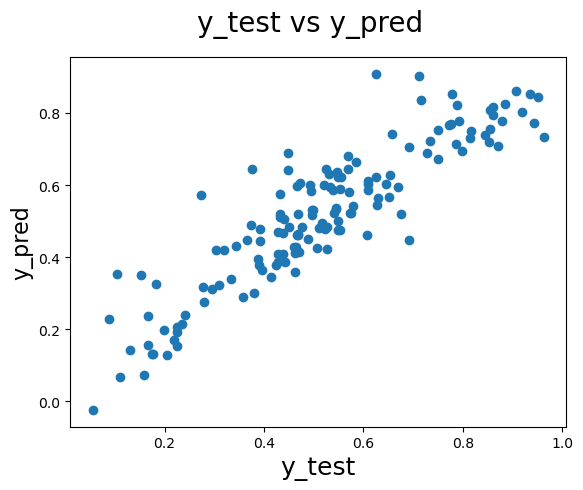

In [58]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [59]:
##Getting the variable names and the coefficient values for the final equation of the best fitted line

param = pd.DataFrame(lm_2.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,16))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param


,Variables,Coefficient value
index,,
12,temp,0.405878
0,const,0.390940
10,yr,0.225011
13,atemp,0.143936
3,season_Winter,0.112878
9,mnth_Sep,0.066405
2,season_Summer,0.044941
5,mnth_Feb,-0.024272
4,mnth_Dec,-0.038377


## Step 8 : Conclusion

- From R-Sqaured and adj R-Sqaured value of both train and test dataset we could conclude that the above variables can well explain more than 82% of bike demand.
- Coeffiencients of the variables explains the factors effecting the bike demand

##### Significant variables to predict the demand for shared bikes

    holiday
    temp
    windspeed
    Season - (Summer, Spring and Winter)
    months(July, September)
    Year
    weathersit (Bad and Moderate)



#### Final Recommendation For The Company :


- The months - Jan , Jul , Sep , Nov , Dec should be considered by the company as they have a higher demand as compared to other months.
- There would be less bookings during Bad and no demand in Severe weather conditions.
- There is no much demand during the holidays
- With an increase in temperature the demand also increases, hence it should keep track of the weather conditions.